# Project 3

## Problem 1

### Routine Demo

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw

In [2]:
from mfcc import compute_mfcc
from dynamic_time_wrapping import dynamic_time_warping, euclidean_distance

In [3]:

def compute_mfccs(file_path):
    """Computes MFCCs from an audio file."""
    try:
        y, sr = librosa.load(file_path, sr=None)  # Load audio
        mfccs = compute_mfcc(y, sr, n_mfcc=13)        
        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def compute_dtw(mfccs1, mfccs2):
    """Computes DTW distance and warping path."""
    try:
        # manhattan_distance = lambda x, y: np.abs(x - y)
        # distance, cost_matrix, acc_cost_matrix, path = dtw(mfccs1, mfccs2, dist=manhattan_distance)
        distance, path = dtw(mfccs1.T, mfccs2.T, dist=lambda x, y: np.linalg.norm(x - y)) # Transpose for dtw
        return distance, path
    except Exception as e:
        print(f"Error computing DTW: {e}")
        return None, None


def visualize_dtw(mfccs1, mfccs2, path, distance, file1_name, file2_name):
    """Visualizes MFCCs and DTW warping path."""

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    librosa.display.specshow(mfccs1, x_axis='time')
    plt.title(f'MFCCs - {file1_name}')
    plt.colorbar()

    plt.subplot(2, 1, 2)
    librosa.display.specshow(mfccs2, x_axis='time')
    plt.title(f'MFCCs - {file2_name}')
    plt.colorbar()

    # Plot warping path on the MFCCs
    x_path = [p[0] for p in path]
    y_path = [p[1] for p in path]

    # Overlay the warping path on both subplots. This is a bit tricky, so we plot on both
    plt.subplot(2,1,1)
    plt.plot(x_path, y_path, color = 'r', linewidth = 2, label="Warping Path")

    plt.subplot(2,1,2)
    plt.plot(x_path, y_path, color = 'r', linewidth = 2, label="Warping Path")
    plt.legend()

    plt.tight_layout()
    plt.suptitle(f"DTW Distance: {distance:.2f}", fontsize=14)  # Add distance to title
    plt.show()

In [4]:
def visualize_dtw_results(distance, cost_matrix, accumulated_cost_matrix, path, sequence1, sequence2):
    print(f"DTW Distance: {distance}")
    print(f"Warping Path: {path}")

    # 1. Cost Matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(cost_matrix, origin='lower', cmap='viridis')
    plt.title('Cost Matrix')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Distance')
    # plt.xticks(np.arange(len(sequence2)), sequence2)
    # plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.show()

    # 2. Accumulated Cost Matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(accumulated_cost_matrix, origin='lower', cmap='viridis')
    plt.title('Accumulated Cost Matrix')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Accumulated Cost')
    # plt.xticks(np.arange(len(sequence2)), sequence2)
    # plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.show()

    # 3. Warping Path
    plt.figure(figsize=(5, 5))
    plt.imshow(accumulated_cost_matrix, origin='lower', cmap='viridis')
    plt.title('Warping Path')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.colorbar(label='Accumulated Cost')
    plt.plot(path[1], path[0], 'r-', linewidth=2)  # Overlay the path
    # plt.xticks(np.arange(len(sequence2)), sequence2)
    # plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.show()

    # 4. Sequences with Warping
    plt.figure(figsize=(8, 4))

    # Check if sequence elements are single numbers or vectors
    if sequence1.ndim == 1:  # 1D sequence
        plt.plot(sequence1, label='Sequence 1', marker='o')
        plt.plot(sequence2, label='Sequence 2', marker='x')
        for i, j in zip(path[0], path[1]):
            plt.plot([j, i], [sequence2[j], sequence1[i]], 'k--', alpha=0.5)
    else:  # Multi-dimensional sequence (MFCCs)
        # Plot the first MFCC coefficient (or another relevant one) for visualization
        plt.plot(sequence1[:, 0], label='Sequence 1 (MFCC 0)', marker='o')  # Plotting the 0th coefficient
        plt.plot(sequence2[:, 0], label='Sequence 2 (MFCC 0)', marker='x')
        for i, j in zip(path[0], path[1]):
            plt.plot([j, i], [sequence2[j, 0], sequence1[i, 0]], 'k--', alpha=0.5)  # Connecting the 0th coefficient

        # Or, if you want to show *all* MFCC coefficients as separate lines, you can do this:
        # for coef_idx in range(sequence1.shape[1]):  # Iterate through MFCC coefficients
        #     plt.plot(sequence1[:, coef_idx], label=f'Sequence 1 (MFCC {coef_idx})', marker='o')
        #     plt.plot(sequence2[:, coef_idx], label=f'Sequence 2 (MFCC {coef_idx})', marker='x')
        #     for i, j in zip(path[0], path[1]):
        #         plt.plot([j, i], [sequence2[j, coef_idx], sequence1[i, coef_idx]], 'k--', alpha=0.5)

    plt.title('Sequences with Warping')
    plt.xlabel('Time/Index')
    plt.ylabel('Value (MFCC Coefficient)') # Updated label
    plt.legend()
    plt.xticks([])
    plt.yticks([])
    plt.show()

DTW Distance: 32.88913536071777
Warping Path: (array([ 0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5,  6,  6,  7,  8,  9, 10,
       10, 11, 11, 11, 12, 12, 13, 14, 15, 16, 16, 16, 16, 16, 16, 17, 17,
       18, 19, 20, 21, 21, 22, 22, 23, 24, 25, 26, 27, 28, 28, 29, 29, 30,
       30, 31, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 42, 43, 44,
       45, 46, 47, 47, 48, 48, 49, 50, 50, 51, 52, 53, 54, 55, 56, 56, 57,
       58]), array([ 0,  1,  2,  3,  4,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 15, 16, 16, 17, 18, 19, 20, 21, 22, 22, 23,
       24, 25, 26, 27, 28, 28, 29, 29, 30, 31, 32, 33, 34, 35, 35, 36, 36,
       37, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 50, 51,
       51, 52, 53, 54, 54, 55, 55, 56, 57, 58, 59, 60, 61, 61, 62, 63, 64,
       65]))


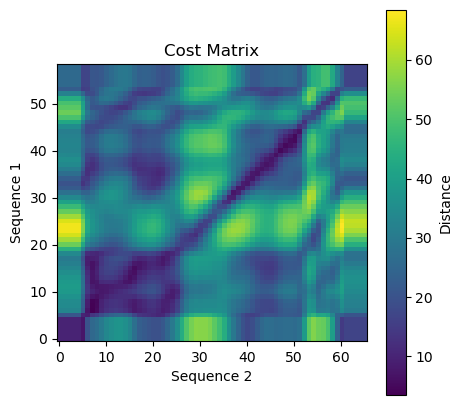

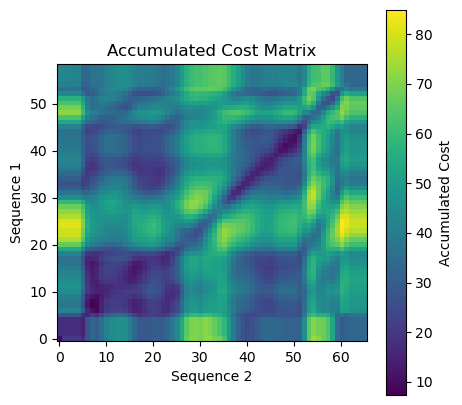

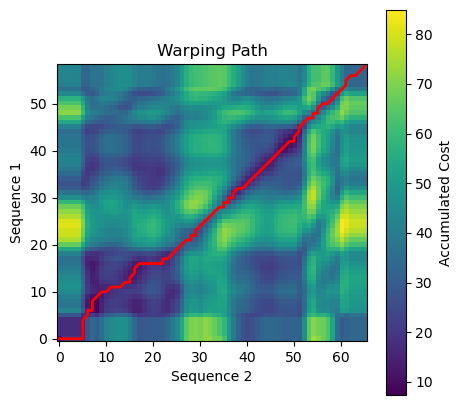

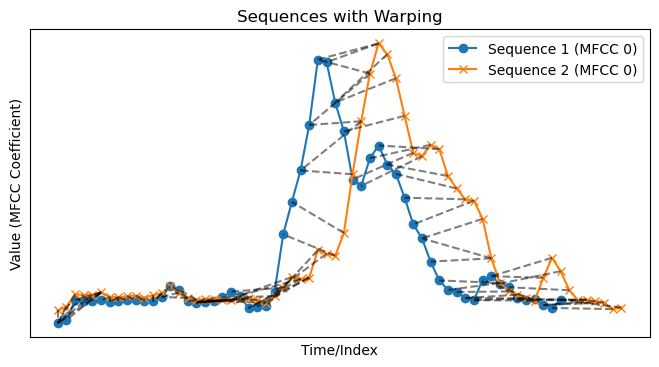

In [5]:
file1_path = "../../recordings/voices/digits/train/00.wav"  # Replace with your actual paths
file2_path = "../../recordings/voices/digits/test/03.wav"

file1_name = file1_path.split("/")[-1] #Extract filename
file2_name = file2_path.split("/")[-1]

mfccs1 = compute_mfccs(file1_path)
mfccs2 = compute_mfccs(file2_path)

# print(mfccs1.shape)
# print(mfccs2.shape)

if mfccs1 is not None and mfccs2 is not None:
    dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_warping(mfccs1.T, mfccs2.T, euclidean_distance)
    visualize_dtw_results(dtw_distance, cost_matrix, accumulated_cost_matrix, path, mfccs1.T, mfccs2.T)
else:
    print("Could not compute MFCCs. Check file paths and audio format.")

In [7]:
import librosa
import numpy as np
import os

def load_digit_data(data_dir):
    """Loads WAV files from the specified directory, using filenames as labels.

    Args:
        data_dir: The directory containing the WAV files.  Expected structure is
                  recordings/voices/digits/train (or similar). Files should be 
                  named 00.wav, 01.wav, ..., 99.wav.

    Returns:
        A tuple containing:
            - data: A NumPy array containing the concatenated audio data.
            - labels: A list of strings representing the corresponding labels.
                      Each label corresponds to a single sample (e.g., "0", "1", ..., "9").
    """

    data = []
    labels = []

    for filename in sorted(os.listdir(data_dir)): # sorted to ensure consistent order
        if filename.endswith(".wav"):
            filepath = os.path.join(data_dir, filename)
            try:
                y, sr = librosa.load(filepath, sr=None) # sr=None to preserve original sample rate
                data.append(y)  # Extend the list, more memory efficient than appending arrays repeatedly.
                label = filename[:1] # Extract the first digit as the label
                labels.append(label)

            except Exception as e:
                print(f"Error loading file {filename}: {e}")
                continue # Skip to the next file if there's an error

    return data, labels


# Example usage:
data_directory = "../../recordings/voices/digits/train"  # Replace with your actual path
audio_data, labels = load_digit_data(data_directory)

print(f"Loaded {len(labels)} samples.")
print(f"Audio data shape: {audio_data.shape}")
print(f"First few labels: {labels[:5]}")

# Now you have 'audio_data' (NumPy array) and 'labels' (list) ready for use.

# Example: Accessing the audio of the first sample:
first_sample_start = 0
first_sample_end = 0
for i in range(len(labels)):
    if i == 0:
        first_sample_end = len(librosa.load(os.path.join(data_directory, str(i).zfill(2)+'.wav'), sr=None)[0])
        break
first_sample = audio_data[first_sample_start:first_sample_end]
print(f"Shape of the first sample: {first_sample.shape}")

# Example: Accessing the audio of the second sample:
second_sample_start = first_sample_end
second_sample_end = 0
for i in range(len(labels)):
    if i == 1:
        second_sample_end = first_sample_end + len(librosa.load(os.path.join(data_directory, str(i).zfill(2)+'.wav'), sr=None)[0])
        break
second_sample = audio_data[second_sample_start:second_sample_end]
print(f"Shape of the second sample: {second_sample.shape}")


# ... (rest of your code)

Loaded 10 samples.


AttributeError: 'list' object has no attribute 'shape'